In [1]:
import requests
import pandas as pd

url = "https://real-time-amazon-data.p.rapidapi.com/search"

brands = "Xiaomi,Apple,Huawei,Samsung"
page = 1  # Start with page 1
results = []

while (page <= 50):
    querystring = {
        "query": "Phone",
        "page": str(page),  # Convert page number to string
        "country": "US",
        "sort_by": "RELEVANCE",
        "category_id": "aps",
        "brand": brands
    }

    headers = {
	"X-RapidAPI-Key": "key_word",
	"X-RapidAPI-Host": "real-time-amazon-data.p.rapidapi.com"
}

    response = requests.get(url, headers=headers, params=querystring)
    
    data = response.json()
    results.extend(data["data"]["products"])
    
    response_json = response.json()
    if 'data' in response_json:
        data = response_json['data']
        if 'products' in data:
            products = data['products']
            results.extend(products)
    

    # Increment the page number to retrieve the next page of results
    page += 1


# Display the DataFrame
print(len(results))

In [2]:
import json
dataset = pd.DataFrame(results)

In [3]:
import pandas as pd
df = pd.read_csv("datasets/dataset.csv")
df = df.drop_duplicates()
df.head()

,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,product_num_offers,product_minimum_offer_price,is_best_seller,is_prime,climate_pledge_friendly
0,B0BXV2XKVF,SAMSUNG Galaxy A14 4G LTE (128GB + 4GB) Unlock...,$136.99,NaN,USD,4.3,255,https://www.amazon.com/dp/B0BXV2XKVF,https://m.media-amazon.com/images/I/717yeZFskG...,NaN,$136.99,False,True,False
1,B0BLP3ZZXT,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...","$1,199.99",NaN,USD,4.7,359,https://www.amazon.com/dp/B0BLP3ZZXT,https://m.media-amazon.com/images/I/71HtN4qqLZ...,NaN,"$1,199.99",False,True,False
2,B0BYM3SD4K,"Apple iPhone 14 Pro Max, 128GB, Deep Purple - ...","$1,080.00","$1,150.00",USD,4.0,99,https://www.amazon.com/dp/B0BYM3SD4K,https://m.media-amazon.com/images/I/51iJx7YWDO...,NaN,"$1,080.00",False,True,True
3,B09R6FJWWS,"SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac...",$418.00,$449.99,USD,4.3,4044,https://www.amazon.com/dp/B09R6FJWWS,https://m.media-amazon.com/images/I/71HN4P-pd5...,NaN,$418.00,False,True,True
4,B09Q98BRRN,SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...,$87.60,NaN,USD,3.8,1686,https://www.amazon.com/dp/B09Q98BRRN,https://m.media-amazon.com/images/I/61EYfTYzWM...,NaN,$87.60,False,True,False


In [4]:
columns_to_clean = ["product_price" , "product_original_price" , "product_minimum_offer_price"]


for column in columns_to_clean:
    df[column] = df[column].str.replace('$', '' ,regex=False)  
    df[column] = df[column].str.replace(',', '' ,regex=False) 
    df[column] = df[column].astype(float) 

In [5]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 312
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         284 non-null    object 
 1   product_title                284 non-null    object 
 2   product_price                284 non-null    float64
 3   product_original_price       284 non-null    float64
 4   currency                     284 non-null    object 
 5   product_star_rating          284 non-null    float64
 6   product_num_ratings          284 non-null    int64  
 7   product_url                  284 non-null    object 
 8   product_photo                284 non-null    object 
 9   product_num_offers           284 non-null    float64
 10  product_minimum_offer_price  284 non-null    float64
 11  is_best_seller               284 non-null    bool   
 12  is_prime                     284 non-null    bool   
 13  climate_pledge_frien

In [6]:
df.head()

,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,product_num_offers,product_minimum_offer_price,is_best_seller,is_prime,climate_pledge_friendly
0,B0BXV2XKVF,SAMSUNG Galaxy A14 4G LTE (128GB + 4GB) Unlock...,136.99,0.00,USD,4.3,255,https://www.amazon.com/dp/B0BXV2XKVF,https://m.media-amazon.com/images/I/717yeZFskG...,0.0,136.99,False,True,False
1,B0BLP3ZZXT,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1199.99,0.00,USD,4.7,359,https://www.amazon.com/dp/B0BLP3ZZXT,https://m.media-amazon.com/images/I/71HtN4qqLZ...,0.0,1199.99,False,True,False
2,B0BYM3SD4K,"Apple iPhone 14 Pro Max, 128GB, Deep Purple - ...",1080.00,1150.00,USD,4.0,99,https://www.amazon.com/dp/B0BYM3SD4K,https://m.media-amazon.com/images/I/51iJx7YWDO...,0.0,1080.00,False,True,True
3,B09R6FJWWS,"SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac...",418.00,449.99,USD,4.3,4044,https://www.amazon.com/dp/B09R6FJWWS,https://m.media-amazon.com/images/I/71HN4P-pd5...,0.0,418.00,False,True,True
4,B09Q98BRRN,SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...,87.60,0.00,USD,3.8,1686,https://www.amazon.com/dp/B09Q98BRRN,https://m.media-amazon.com/images/I/61EYfTYzWM...,0.0,87.60,False,True,False


Product Insights:
What are the top-rated products based on their star ratings?
What is the average star rating for products in this dataset?
What is the range of product prices?
Which products have the highest number of ratings?

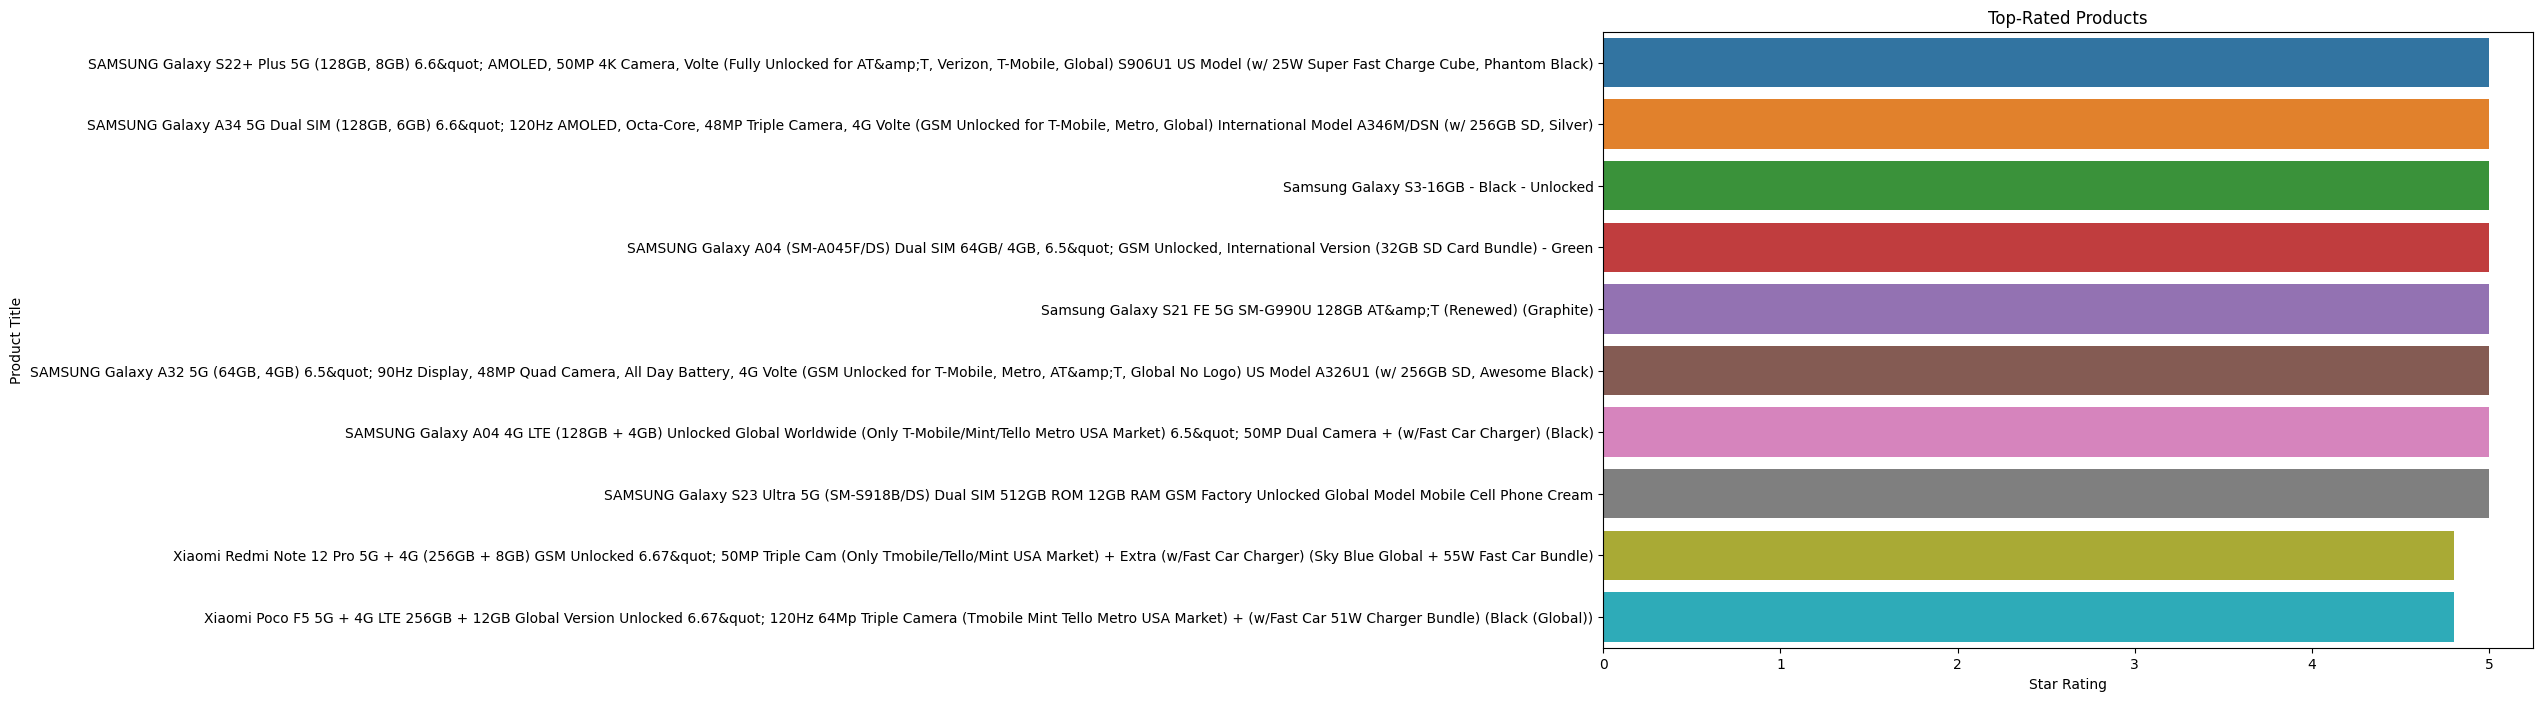

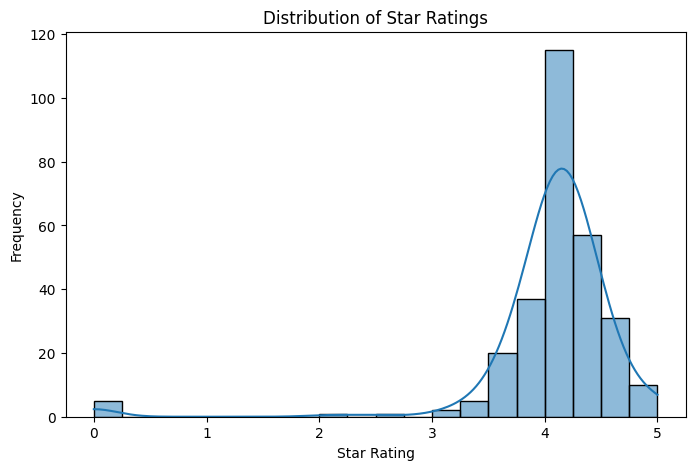

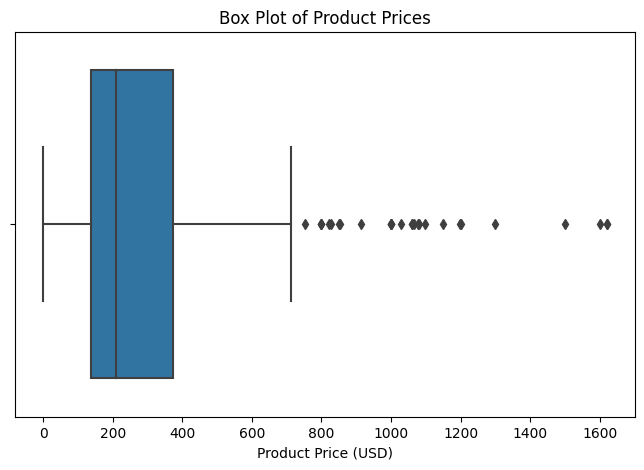

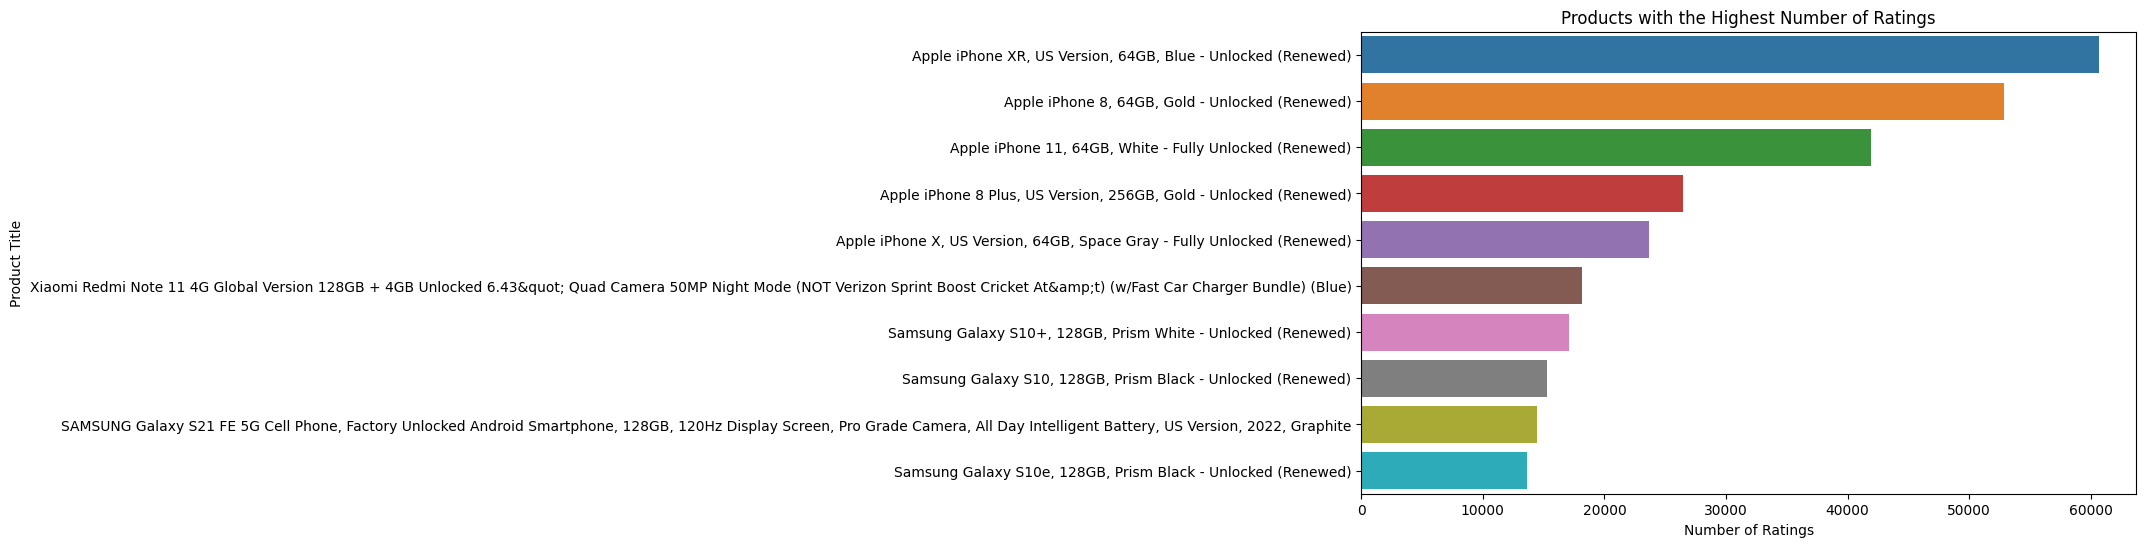

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the dataset into a DataFrame named 'df'

# Top-rated products based on star ratings
top_rated_products = df.sort_values(by='product_star_rating', ascending=False)

# Average star rating for products
average_star_rating = df['product_star_rating'].mean()

# Range of product prices
min_price = df['product_price'].min()
max_price = df['product_price'].max()

# Products with the highest number of ratings
popular_products = df.sort_values(by='product_num_ratings', ascending=False)

# Visualizations

# Bar plot for top-rated products
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rated_products.head(10), x='product_star_rating', y='product_title')
plt.title('Top-Rated Products')
plt.xlabel('Star Rating')
plt.ylabel('Product Title')
plt.show()

# Histogram for star ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['product_star_rating'], bins=20, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

# Box plot for product prices
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='product_price')
plt.title('Box Plot of Product Prices')
plt.xlabel('Product Price (USD)')
plt.show()

# Bar plot for products with the highest number of ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_products.head(10), x='product_num_ratings', y='product_title')
plt.title('Products with the Highest Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Title')
plt.show()

Price Analysis:
What is the distribution of product prices?
Are there any products with significant discounts from their original prices?
Which products are marked as best sellers?

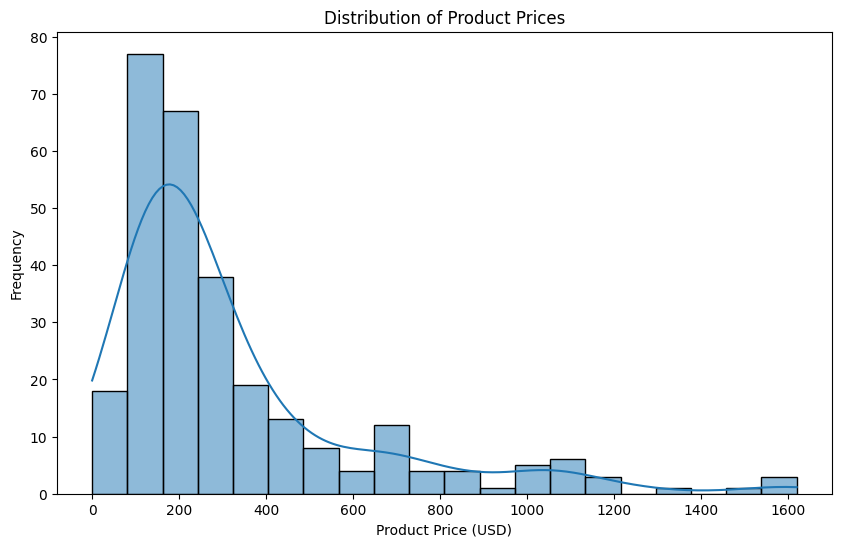

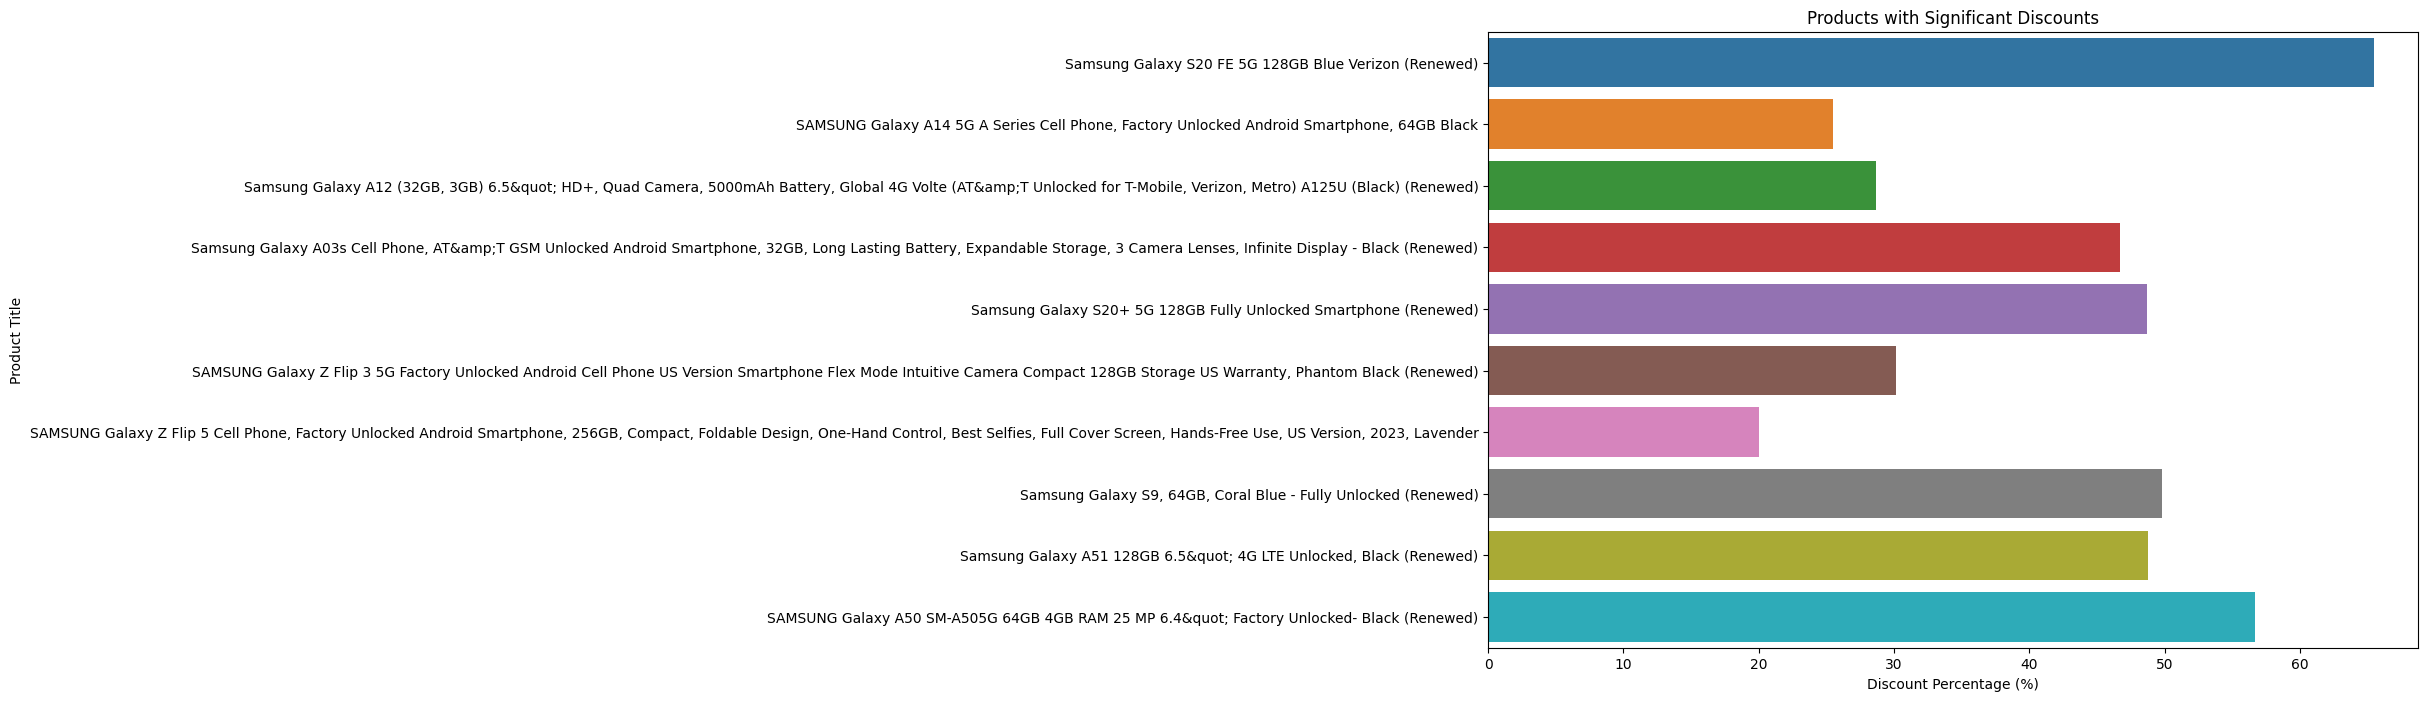

In [8]:
# Create a histogram for product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['product_price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price (USD)')
plt.ylabel('Frequency')
plt.show()


# Calculate the discount percentage
df['discount_percentage'] = ((df['product_original_price'] - df['product_price']) / df['product_original_price']) * 100

# Filter products with significant discounts (e.g., greater than 20%)
significant_discount_products = df[df['discount_percentage'] > 20]

# Create a bar plot for products with significant discounts
plt.figure(figsize=(12, 8))
sns.barplot(data=significant_discount_products.head(10), x='discount_percentage', y='product_title')
plt.title('Products with Significant Discounts')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Product Title')
plt.show()

In [9]:
# Filter products marked as best sellers
best_seller_products = df[df['is_best_seller']]

# Display products marked as best sellers
print("Best Seller Products:")
print(best_seller_products[['product_title', 'product_price']])

Best Seller Products:
                                        product_title  product_price
73  Apple iPhone 11, 64GB, White - Fully Unlocked ...          304.0


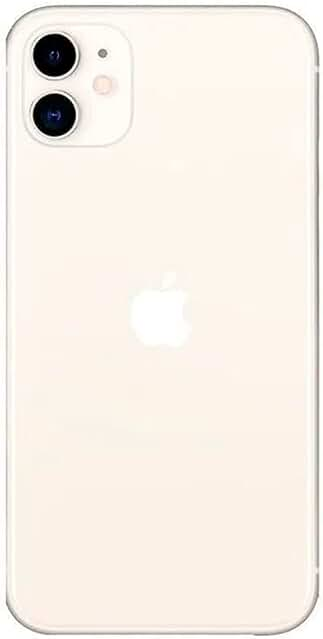

In [10]:
# Displaying the Image of the Best-Seller-Phone
import requests
from PIL import Image
from io import BytesIO

selected_product = best_seller_products.iloc[0]

# Get the image URL from the 'product_photo' column
image_url = selected_product['product_photo']

# Send an HTTP request to the image URL and load the image
response = requests.get(image_url)
if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    
    # Show the image
    image.show()
else:
    print(f"Failed to download image: {image_url}")

Prime and Climate Pledge Friendly:
How many products are marked as "Prime"?
How many products are marked as "Climate Pledge Friendly"?
Are certain brands more likely to be marked as "Prime" or "Climate Pledge Friendly"?

In [11]:
# List of known brands (converted to lowercase)
known_brands = ["xiaomi", "apple", "huawei", "samsung"]

# Function to extract the brand from the product title
def extract_brand(title):
    title_lower = title.lower()  # Convert the title to lowercase for case-insensitive comparison
    for brand in known_brands:
        if brand in title_lower:
            return brand.capitalize()  # Capitalize the brand name
    if "iphone" in title_lower:
        return "Apple"
    
    if "poco" in title_lower:
        return "Xiaomi"
    if "galaxy" in title_lower:
        return "Samsung"
    
    return "Other"  # Default to "Other" if no match is found

# Create the 'brand' column by applying the extract_brand function
df['brand'] = df['product_title'].apply(extract_brand)

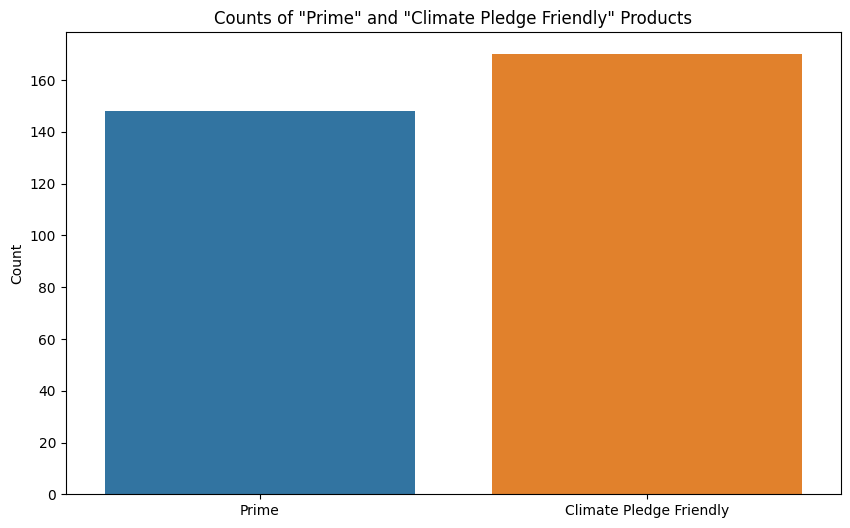

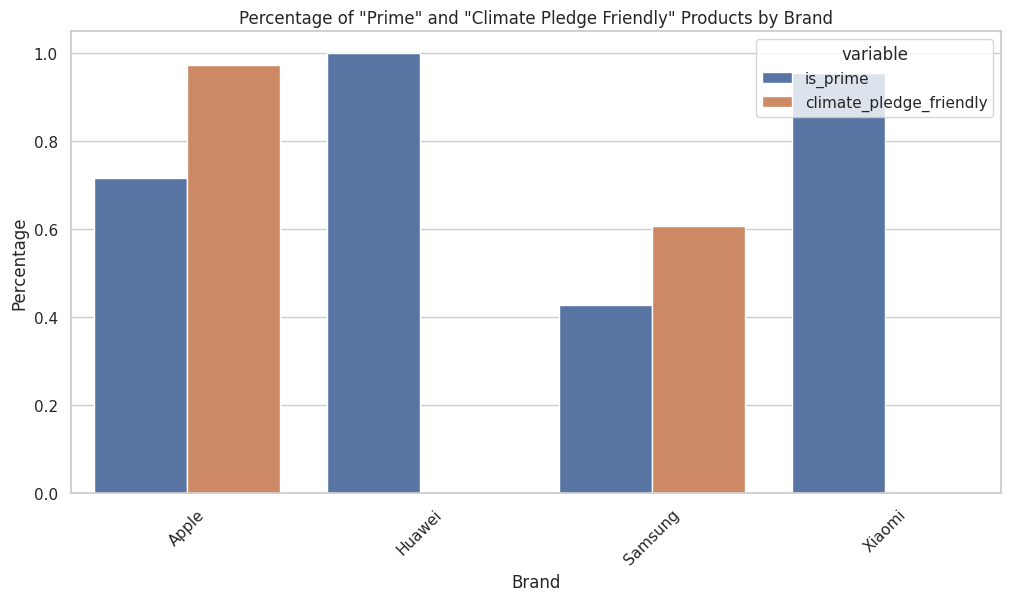

Percentage of 'Prime' and 'Climate Pledge Friendly' Products by Brand:
     brand  is_prime  climate_pledge_friendly
0    Apple  0.717949                 0.974359
1   Huawei  1.000000                 0.000000
2  Samsung  0.428571                 0.608295
3   Xiaomi  0.956522                 0.000000


In [12]:
# Count the number of products marked as "Prime" and "Climate Pledge Friendly"
prime_count = df['is_prime'].sum()
climate_friendly_count = df['climate_pledge_friendly'].sum()

# Create a bar plot for the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=['Prime', 'Climate Pledge Friendly'], y=[prime_count, climate_friendly_count])
plt.title('Counts of "Prime" and "Climate Pledge Friendly" Products')
plt.ylabel('Count')
plt.show()

# Group the data by brand and calculate the percentage of "Prime" and "Climate Pledge Friendly" products
brand_markings = df.groupby('brand')[['is_prime', 'climate_pledge_friendly']].mean().reset_index()

# Create a table for the percentages
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=brand_markings.melt(id_vars='brand'), x='brand', hue='variable', y='value')
ax.set(xlabel='Brand', ylabel='Percentage')
plt.title('Percentage of "Prime" and "Climate Pledge Friendly" Products by Brand')
plt.xticks(rotation=45)
plt.show()

# Display the brands with their respective percentages in tabular form
print("Percentage of 'Prime' and 'Climate Pledge Friendly' Products by Brand:")
print(brand_markings)

Offer Analysis:
What is the minimum and maximum offer price among products with multiple offers?
What are the products with Highest offer price ?

In [13]:
# Calculate the minimum and maximum offer prices
min_offer_price = df[df['product_minimum_offer_price'] > 0 ]['product_minimum_offer_price'].min()
max_offer_price = df['product_minimum_offer_price'].max()

min_offer_price_product = df[df["product_minimum_offer_price"] == min_offer_price]["product_title"]
max_offer_price_product = df[df["product_minimum_offer_price"] == max_offer_price]["product_title"]

print(f"Minimum offer price among products with multiple offers: ${min_offer_price:.2f}{min_offer_price_product}")
print("")
print(f"Maximum offer price among products with multiple offers: ${max_offer_price:.2f}{max_offer_price_product}")

Minimum offer price among products with multiple offers: $69.95306    Samsung Galaxy J7 J737V 16GB Verizon + GSM Unl...
Name: product_title, dtype: object

Maximum offer price among products with multiple offers: $1619.9935     SAMSUNG Galaxy Z Fold 5 Cell Phone, Factory Un...
311    SAMSUNG Galaxy Z Fold 5 Cell Phone, Factory Un...
Name: product_title, dtype: object


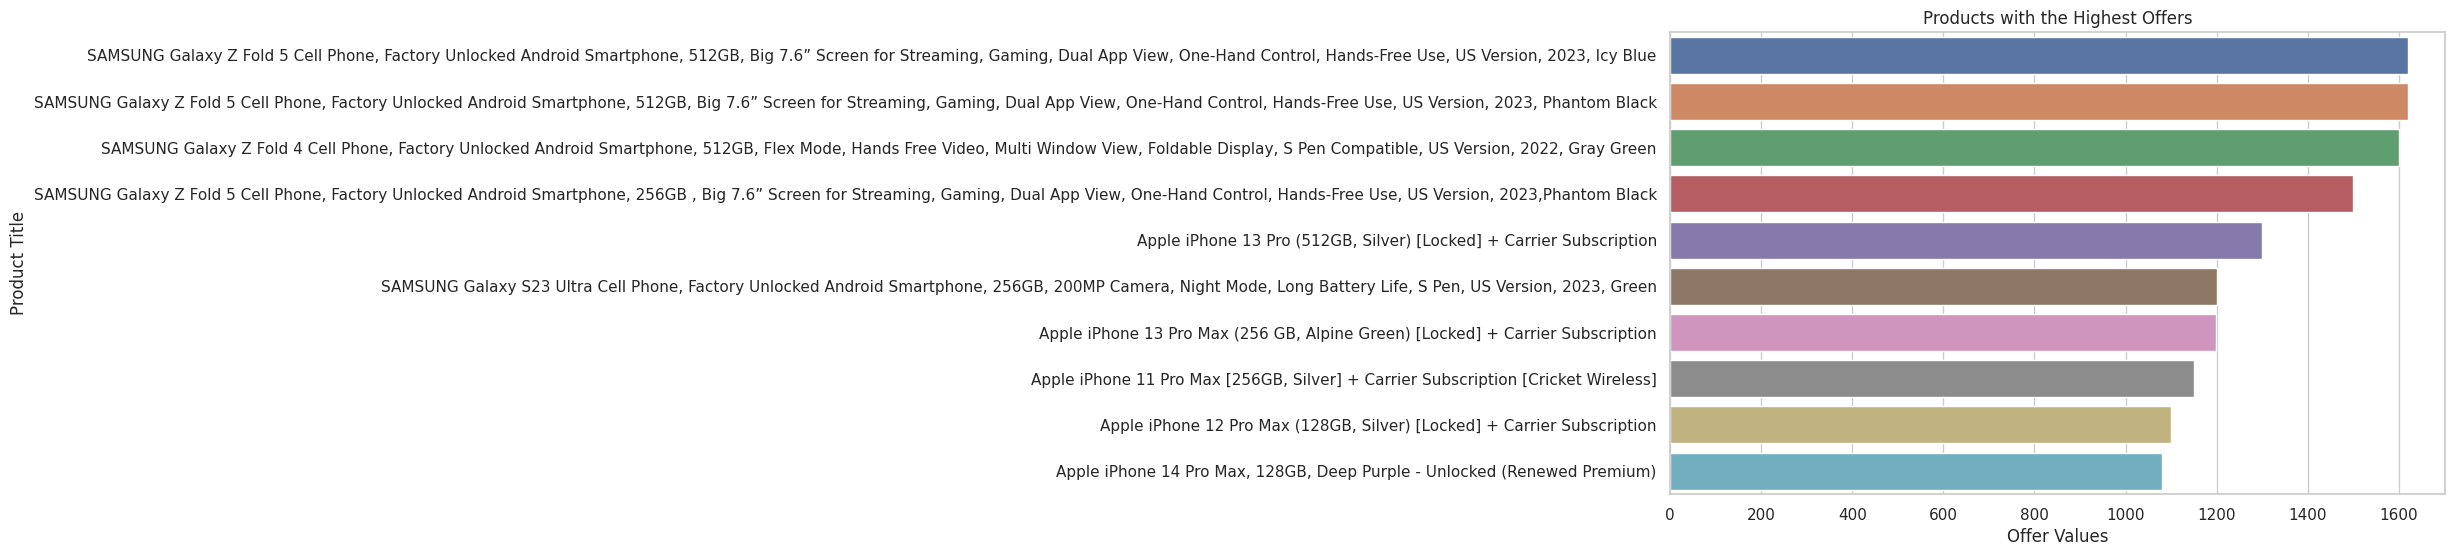

In [14]:
#visualizing products with highest offers 

products_offer = df.sort_values(by='product_minimum_offer_price', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=products_offer.head(10), x='product_minimum_offer_price', y='product_title')
plt.title('Products with the Highest Offers')
plt.xlabel('Offer Values')
plt.ylabel('Product Title')
plt.show()

Comparison:
How do products from different brands compare in terms of ratings and prices?

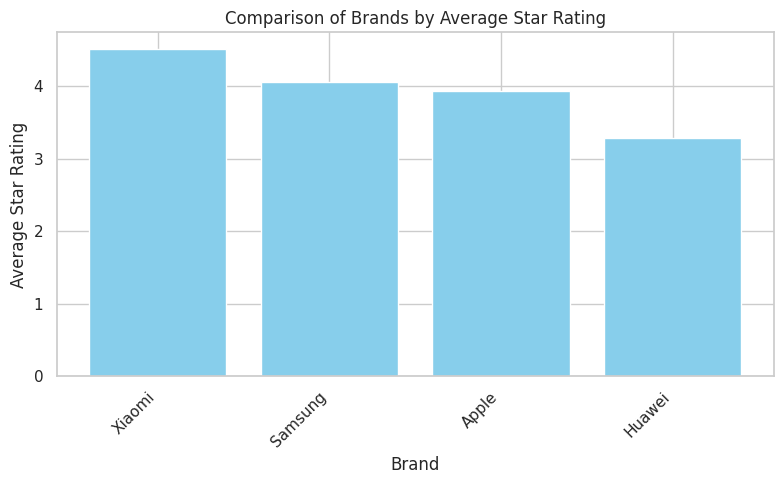

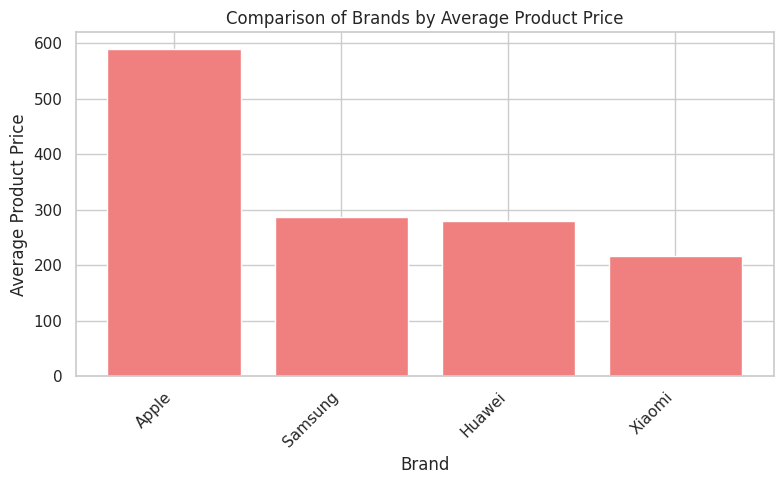

In [15]:
# Group the data by the 'brand' column.
grouped = df.groupby('brand')

# Calculate the average star rating for each brand.
brand_avg_star_rating = grouped['product_star_rating'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the brand comparison for average star rating
plt.figure(figsize=(8, 5))
plt.bar(brand_avg_star_rating.index, brand_avg_star_rating, color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Star Rating')
plt.title('Comparison of Brands by Average Star Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

# Calculate the average product price for each brand.
brand_avg_price = grouped['product_price'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the brand comparison for average product price
plt.figure(figsize=(8, 5))
plt.bar(brand_avg_price.index, brand_avg_price, color='lightcoral')
plt.xlabel('Brand')
plt.ylabel('Average Product Price')
plt.title('Comparison of Brands by Average Product Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

What are the main Categories and types of Phone products ?

In [16]:
!pip install sentence_transformers
!pip install preprocessor
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [17]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

import re
import preprocessor as p

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud


corpus = list(df['product_title'])
corpus_embeddings = embedder.encode(corpus)
corpus_embeddings

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-09-18 04:34:39.089479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 04:34:39.263564: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-18 04:34:39.263601: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
202

array([[-0.30876437, -0.7195927 ,  0.92293465, ...,  0.35684162,
         0.12264092, -1.1621052 ],
       [-0.35673517, -0.2581161 ,  0.99484926, ...,  0.68756795,
        -0.07134362, -1.3164098 ],
       [-0.61908674, -0.30639392,  0.7822081 , ...,  0.32055163,
        -0.1839002 , -0.89408857],
       ...,
       [-1.140615  , -0.30745298,  0.8430999 , ...,  0.26232353,
        -0.3392139 , -0.68813723],
       [-0.67722523, -0.11423748,  0.7598571 , ...,  0.6052045 ,
         0.0312317 , -0.927164  ],
       [-0.5853416 , -0.08995907,  0.81067795, ...,  0.5668397 ,
        -0.00501776, -1.0967065 ]], dtype=float32)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


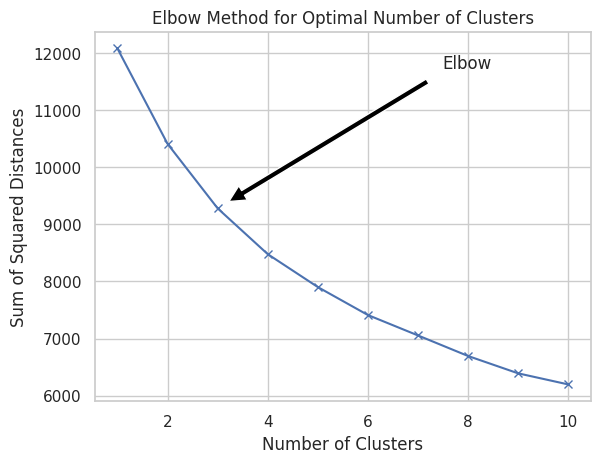

In [18]:
import numpy as np

# Assuming you have already computed corpus_embeddings and want to test num_clusters
# Calculate the sum of squared distances for a range of cluster numbers
sum_of_squared_distances = []
possible_num_clusters = range(1, 11)  # Test for up to 10 clusters

for num_clusters in possible_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(corpus_embeddings)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the sum of squared distances (inertia) for different numbers of clusters
plt.plot(possible_num_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')

# Mark the "elbow point"
plt.annotate('Elbow', xy=(3, sum_of_squared_distances[2]), xytext=(0.7, 0.9),
             textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             )

plt.show()

In [19]:
# Define the number of clusters you want
num_clusters = 3  # You can change this number to your desired number of clusters

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(corpus_embeddings)
cluster_labels = kmeans.predict(corpus_embeddings)

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Print the cluster assignments
print("Cluster Assignments:")
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['product_title'])
    

Cluster Assignments:
Cluster 0:
1      SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...
3      SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac...
6      Samsung Galaxy S20 FE 5G 128GB Blue Verizon (R...
7      SAMSUNG Galaxy A14 5G A Series Cell Phone, Fac...
8      SAMSUNG Galaxy A14 (128GB, 4GB) 6.6&#x27;&#x27...
                             ...                        
307    SAMSUNG Galaxy S23+ Plus Cell Phone, Factory U...
308    SAMSUNG Galaxy S23+ Plus Cell Phone, Factory U...
309    SAMSUNG Galaxy S23+ Plus Cell Phone, Factory U...
311    SAMSUNG Galaxy Z Fold 5 Cell Phone, Factory Un...
312    SAMSUNG Galaxy Z Fold 5 Cell Phone, Factory Un...
Name: product_title, Length: 154, dtype: object
Cluster 1:
2      Apple iPhone 14 Pro Max, 128GB, Deep Purple - ...
5      Apple iPhone 13 Pro Max (256 GB, Alpine Green)...
12     Samsung Galaxy S10, 128GB, Prism Black - Unloc...
19     Samsung Galaxy S10e, 128GB, Prism Black - Unlo...
20     Apple iPhone 13 Pro (512GB, Silver) [Locked] +.

In [20]:
cluster_huawei = df[df['cluster'] == 0]
huawei_products = cluster_huawei[cluster_huawei['product_title'].str.contains('Huawei')]
print(huawei_products['product_title'])

print(" ")

cluster_huawei = df[df['cluster'] == 1]
huawei_products = cluster_huawei[cluster_huawei['product_title'].str.contains('Huawei')]
print(huawei_products['product_title'])

print(" ")

cluster_huawei = df[df['cluster'] == 2]
huawei_products = cluster_huawei[cluster_huawei['product_title'].str.contains('Huawei')]
print(huawei_products['product_title'])


119    Huawei Mate 10 Porsche Design Factory Unlocked...
208    Huawei Y9s 6GB 128GB 6.59” Display, 48MP Tripl...
Name: product_title, dtype: object
 
Series([], Name: product_title, dtype: object)
 
98     Huawei P20 Lite 64GB Sakura Pink, Dual Sim, 5....
234    Huawei Y7 Prime 2018 4G LTE 32GB Dual Sim Fact...
Name: product_title, dtype: object


In [21]:
from collections import Counter
# Analyze the most common words within each cluster
for cluster_id in range(num_clusters):
    cluster_titles = df[df['cluster'] == cluster_id]['product_title']
    
    # Combine all titles in the cluster into a single text
    cluster_text = " ".join(cluster_titles)
    
    # Tokenize the text and count word frequencies
    tokens = re.findall(r'\b\w+\b', cluster_text.lower())
    word_counts = Counter(tokens)
    
    # Print the most common words in the cluster
    print(f"Cluster {cluster_id} - Most Common Words:")
    for word, count in word_counts.most_common(10):  # Adjust the number as needed
        print(f"{word}: {count}")
    print("\n")

Cluster 0 - Most Common Words:
samsung: 150
galaxy: 147
unlocked: 110
renewed: 105
black: 97
5g: 89
smartphone: 85
android: 73
128gb: 69
t: 63


Cluster 1 - Most Common Words:
renewed: 41
unlocked: 38
iphone: 36
apple: 33
128gb: 25
samsung: 17
galaxy: 17
pro: 13
carrier: 13
subscription: 13


Cluster 2 - Most Common Words:
unlocked: 69
6: 56
dual: 53
samsung: 50
galaxy: 50
quot: 47
4g: 46
charger: 42
gsm: 39
128gb: 37




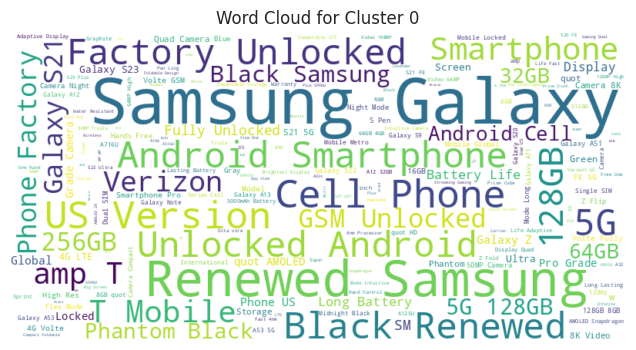

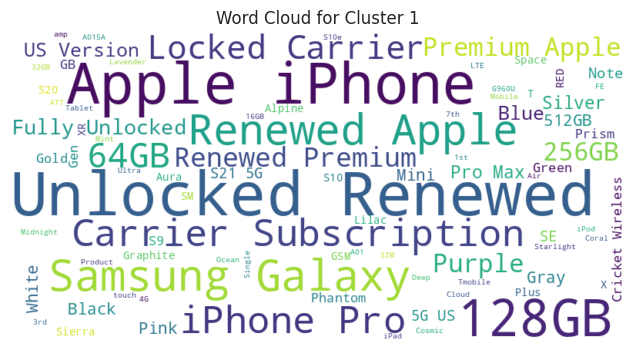

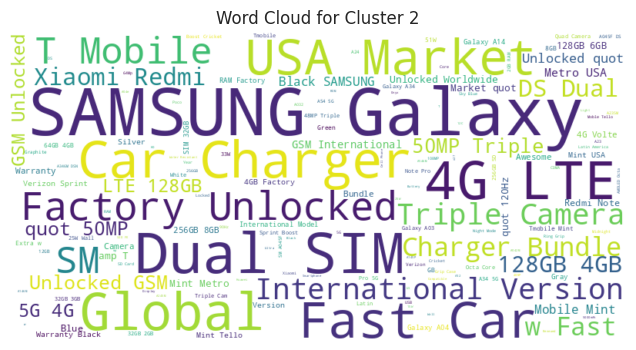

In [22]:
# still working on it.
# Create word clouds for each cluster
for cluster_id in range(num_clusters):
    cluster_text = " ".join(df[df['cluster'] == cluster_id]['product_title'])
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    # Display the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_id}')
    plt.axis('off')
    plt.show()

Summarizing Product_reviews :

In [23]:
df["product_url"].iloc[:5]

0    https://www.amazon.com/dp/B0BXV2XKVF
1    https://www.amazon.com/dp/B0BLP3ZZXT
2    https://www.amazon.com/dp/B0BYM3SD4K
3    https://www.amazon.com/dp/B09R6FJWWS
4    https://www.amazon.com/dp/B09Q98BRRN
Name: product_url, dtype: object

In [24]:
def get_review_url(product_url):
    try:
        split_url = product_url.split('dp')
        product_number = split_url[1].split('/')[1]
        review_url = split_url[0] + 'product-reviews/' + product_number + "/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    except:
        review_url = None
    return review_url


object


In [25]:
# Create review urls for each book in dataset
df['review_urls'] = df['product_url'].apply(lambda x: get_review_url(x))

# Remove empty review urls and create a new dataset
df_reviews = df.loc[~df['review_urls'].isnull()].reset_index()

In [26]:
df_reviews

,index,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,product_num_offers,product_minimum_offer_price,is_best_seller,is_prime,climate_pledge_friendly,discount_percentage,brand,cluster,review_urls
0,0,B0BXV2XKVF,SAMSUNG Galaxy A14 4G LTE (128GB + 4GB) Unlock...,136.99,0.00,USD,4.3,255,https://www.amazon.com/dp/B0BXV2XKVF,https://m.media-amazon.com/images/I/717yeZFskG...,0.0,136.99,False,True,False,-inf,Samsung,2,https://www.amazon.com/product-reviews/B0BXV2X...
1,1,B0BLP3ZZXT,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1199.99,0.00,USD,4.7,359,https://www.amazon.com/dp/B0BLP3ZZXT,https://m.media-amazon.com/images/I/71HtN4qqLZ...,0.0,1199.99,False,True,False,-inf,Samsung,0,https://www.amazon.com/product-reviews/B0BLP3Z...
2,2,B0BYM3SD4K,"Apple iPhone 14 Pro Max, 128GB, Deep Purple - ...",1080.00,1150.00,USD,4.0,99,https://www.amazon.com/dp/B0BYM3SD4K,https://m.media-amazon.com/images/I/51iJx7YWDO...,0.0,1080.00,False,True,True,6.086957,Apple,1,https://www.amazon.com/product-reviews/B0BYM3S...
3,3,B09R6FJWWS,"SAMSUNG Galaxy A53 5G A Series Cell Phone, Fac...",418.00,449.99,USD,4.3,4044,https://www.amazon.com/dp/B09R6FJWWS,https://m.media-amazon.com/images/I/71HN4P-pd5...,0.0,418.00,False,True,True,7.109047,Samsung,0,https://www.amazon.com/product-reviews/B09R6FJ...
4,4,B09Q98BRRN,SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...,87.60,0.00,USD,3.8,1686,https://www.amazon.com/dp/B09Q98BRRN,https://m.media-amazon.com/images/I/61EYfTYzWM...,0.0,87.60,False,True,False,-inf,Samsung,2,https://www.amazon.com/product-reviews/B09Q98B...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,308,B0BLP4J9RR,"SAMSUNG Galaxy S23+ Plus Cell Phone, Factory U...",999.99,0.00,USD,4.5,159,https://www.amazon.com/dp/B0BLP4J9RR,https://m.media-amazon.com/images/I/71wmNVsS9T...,0.0,999.99,False,True,False,-inf,Samsung,0,https://www.amazon.com/product-reviews/B0BLP4J...
280,309,B0BLNZVRK2,"SAMSUNG Galaxy S23+ Plus Cell Phone, Factory U...",999.99,0.00,USD,4.6,100,https://www.amazon.com/dp/B0BLNZVRK2,https://m.media-amazon.com/images/I/71LY9chfAK...,0.0,999.99,False,True,False,-inf,Samsung,0,https://www.amazon.com/product-reviews/B0BLNZV...
281,310,B08124P8MC,Apple iPod touch (256GB) - Pink (7th Gen) (Ren...,399.99,519.95,USD,4.1,23,https://www.amazon.com/dp/B08124P8MC,https://m.media-amazon.com/images/I/815uXhGZih...,0.0,399.99,False,True,False,23.071449,Apple,1,https://www.amazon.com/product-reviews/B08124P...
282,311,B0C63689JH,"SAMSUNG Galaxy Z Fold 5 Cell Phone, Factory Un...",1619.99,1919.99,USD,4.1,8,https://www.amazon.com/dp/B0C63689JH,https://m.media-amazon.com/images/I/61LyIe34PV...,0.0,1619.99,False,True,False,15.625081,Samsung,0,https://www.amazon.com/product-reviews/B0C6368...


In [27]:
# Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df_reviews['review_urls']
product_title = df_reviews['product_title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': df_reviews['product_title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"phone_reviews.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

INFO:root:https://www.amazon.com/product-reviews/B0BXV2XKVF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/product-reviews/B0BLP3ZZXT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/product-reviews/B0BYM3SD4K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/product-reviews/B09R6FJWWS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/product-reviews/B09Q98BRRN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/product-reviews/B09V3HZ8B5/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/product-reviews/B09LG4PSB6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/product-reviews/B0C1Q3MVBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com

In [28]:
out

,review_text,review_stars,title
0,Great item highly recommend.,4.0 out of 5 stars,"Apple iPhone 14 Pro Max, 128GB, Deep Purple - ..."
1,This phone works as stated above. I like it. I...,5.0 out of 5 stars,"Apple iPhone 14 Pro Max, 128GB, Deep Purple - ..."
2,I purchase it because I wanna try new iPhone. ...,3.0 out of 5 stars,"Apple iPhone 14 Pro Max, 128GB, Deep Purple - ..."
3,The battery health was 100 percent when I got ...,5.0 out of 5 stars,"Apple iPhone 14 Pro Max, 128GB, Deep Purple - ..."
4,Very impressed by Amazon renewed. If you can s...,5.0 out of 5 stars,"Apple iPhone 14 Pro Max, 128GB, Deep Purple - ..."
...,...,...,...
162,"Sem dúvidas uma ótima aquisição, estou usando ...",5.0 out of 5 stars,Xiaomi M5s 4G LTE GSM (128GB + 6GB) 64MP Quad ...
163,"O aparelho é otimo, o fato da digital ser na l...",5.0 out of 5 stars,Xiaomi M5s 4G LTE GSM (128GB + 6GB) 64MP Quad ...
164,"Realizei a compra de duas unidades, sendo uma ...",5.0 out of 5 stars,Xiaomi M5s 4G LTE GSM (128GB + 6GB) 64MP Quad ...
165,"Que puedo decir de este gran celular, llevo un...",5.0 out of 5 stars,Xiaomi M5s 4G LTE GSM (128GB + 6GB) 64MP Quad ...


In [29]:
data = pd.read_csv('datasets/phone_reviews.csv')
data.columns

Index(['review_text', 'review_stars', 'title'], dtype='object')

In [30]:
pip install sumy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
import nltk

# Download the NLTK tokenizers
nltk.download('punkt')

# Initialize the parser and tokenizer
def generate_summary(review_text):
    parser = PlaintextParser.from_string(review_text, Tokenizer("english"))

    # Initialize the LexRank summarizer
    summarizer = LexRankSummarizer()

    # Generate the summary with a specified number of sentences
    summary = summarizer(parser.document, sentences_count=2)  # Adjust sentences_count as needed

    # Convert the summary back to a string
    summary_text = " ".join([str(sentence) for sentence in summary])

    return summary_text

# Apply the summarization function to the 'review_text' column and create a new column for summaries
data['summary'] = data['review_text'].apply(generate_summary)

# Save the updated dataset with summaries to a new file
# Replace 'your_output_dataset.csv' with your desired output filename
data.to_csv('summarized_dataset.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
summaries = pd.read_csv('datasets/summarized_dataset.csv')
summaries[["review_text" , "summary"]].head()

,review_text,summary
0,Great item highly recommend.,Great item highly recommend.
1,This phone works as stated above. I like it. I...,This phone works as stated above. I like it.
2,I purchase it because I wanna try new iPhone. ...,I was embarrassed because the web site states ...
3,The battery health was 100 percent when I got ...,The battery health was 100 percent when I got ...
4,Very impressed by Amazon renewed. If you can s...,Very impressed by Amazon renewed. If you can s...


In [35]:
from IPython.display import display, Markdown
display(Markdown(summaries.review_text[2]))

I purchase it because I wanna try new iPhone. when I received, I found there is no sim tray. I was embarrassed because the web site states they will provide 'SIM tray removal tool' and there is no sim tray in the iPhone. it is very inconvenience to me because I have several SIM cards with different countries network and some don't provide esim function.moreover, another inconvenience such be multiscreen. I use Samsung galaxy s21 ultra in pass and multiscreen is one of the important function for searching when I need two browsers in one screen at the same time. I can't believe that iPhone do not support this function but only provide pic-in-pic for YouTube only.screen is beautiful and shape, battery is good and can last for whole day and more, and some apps are good such as to-do list. but that's not enough for me to switch to apple phone.just beware when you purchase

In [36]:
display(Markdown(summaries.summary[2]))

I was embarrassed because the web site states they will provide 'SIM tray removal tool' and there is no sim tray in the iPhone. but that's not enough for me to switch to apple phone.just beware when you purchase

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cdb54498-29e9-4c0a-94ef-629df21c9654' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>